# EXERCÍCIO 2: ANÁLISE EXPLORATÓRIA DOS DADOS

### Gerando gráficos

Primeiramente, analisamos um grande banco de dados que nos foi fornecido e extraímos as informações de interesse, exibindo-as em um gráfico de setores

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a"

# Read the table from the URL into a dataframe
dataf = pd.read_html(url)[0]

labels = ['Developing', 'Developed']
sizes = dataf['Status'].value_counts()

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode = [0.1,0])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Gerando histograma e analisando variância

Por meio de bibliotecas como numpy, podemos analisar nossos dados numéricos rapidamente, por meio de funções já prontas de média e mediana já imbutidas. Por meio destes, e utilizando as informações observadas em um histograma (gráfico de área total 1), podemos ter um novo entendimento sobre o que encontramos, e quão correlacionados nossos dados estão (ajudadando a comparar futuras informçãoes, e ajudando a prever novos dados).

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
import matplotlib.pyplot as plt

url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a"

# Read the table from the URL into a dataframe
dataf = pd.read_html(url)[0]

data = dataf['Life_expectancy']
num_bins = 20

fig= plt.figure(figsize=(6,5))

n, bins, patches = plt.hist(data, num_bins, facecolor='blue', alpha=0.5, density=True, edgecolor='black', linewidth=1.2)
plt.xlabel("Expectativa de vida", fontsize = 15)
plt.ylabel("Porcentagem", fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

med = np.mean(data)
print('A média da expectativa de vida:', med)

def variancia(data):
    m = np.mean(data)
    N = len(data)
    s = 0
    for i in np.arange(0, len(data)):
        s = s + (data[i]-m)**2
    s = s/(N-1)
    return s

print('Variância do dado:', variancia(data))

# Outras informações de relevância sobre o dado
#print('IQR do dado:', iqr(data))
#print('Amplitude dos dados:', np.max(data)-np.min(data))

### Analisando dados específicos

Agora escolhemos alguns países para analisar de forma mais próxima ao longo do tempo, e, similarmente, escolhemos um momento específico para analisar os países

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregamento dos dados
url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a"

# Lê e filtra os dados
dataf = pd.read_html(url)[0]
paises_analisados = ['Ireland', 'Finland', 'Netherlands', 'Zambia', 'Angola']
filtered_data = dataf[dataf['Country'].isin(paises_analisados)]

# Versão do plot usando groupby
fig, ax = plt.subplots(figsize=(10, 6))

# Agrupa por país e plota diretamente
for country, group in filtered_data.groupby('Country'):
    ax.plot(group['Year'], group['Life_expectancy'], label=country, marker='o', markersize=4)

# Configurações do gráfico
ax.legend()
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Expectativa de vida', fontsize=12)
ax.set_title('Expectativa de vida ao longo do tempo', fontsize=14)
plt.show()

# Análise específica do ano de 2014
data_2014 = dataf[dataf['Year'] == 2014]

# Encontrando os extremos do ano escolhido 
country_highest = data_2014.loc[data_2014['Life_expectancy'].idxmax(), 'Country']
country_lowest = data_2014.loc[data_2014['Life_expectancy'].idxmin(), 'Country']

print(f"País com a maior expectativa de vida em 2014: {country_highest}")
print(f"País com a menor expectativa de vida em 2014: {country_lowest}")

### Análise exploratória de dados

Podemos exibir dados por meio de gráficos, como boxplot, e avaliar mais facilmente a existência de outliers e suas medianas (Também conhecida como a linha do segundo quartil)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo do seaborn
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a"
dataf = pd.read_html(url)[0]

# Países para análise
paises_analisados = ['Ireland', 'Finland', 'Netherlands', 'Zambia', 'Angola']

# Filtrar dados para os países selecionados
filtered_data = dataf[dataf['Country'].isin(paises_analisados)].copy()

# Criar o boxplot
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=filtered_data, 
                 x='Country', 
                 y='Schooling',
                 order=paises_analisados,
                 palette='Set2')

# Personalizar o gráfico
plt.title('Distribuição da Escolaridade por País', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('País', fontsize=14)
plt.ylabel('Anos de Escolaridade', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Adicionar linha da mediana geral
overall_median = filtered_data['Schooling'].median()
plt.axhline(y=overall_median, color='red', linestyle='--', alpha=0.7, 
           label=f'Mediana Geral: {overall_median:.1f} anos')
plt.legend()

plt.tight_layout()
plt.show()

# Calcular e exibir as medianas
print("ANÁLISE DAS MEDIANAS DE ESCOLARIDADE")

medianas = {}
for country in paises_analisados:
    country_data = filtered_data[filtered_data['Country'] == country]['Schooling']
    if not country_data.empty:
        median_value = country_data.median()
        medianas[country] = median_value
        print(f"{country:<15}: {median_value:.2f} anos")
    
print("\n")

# Encontrar o país com maior mediana
if medianas:
    pais_maior_mediana = max(medianas, key=medianas.get)
    maior_mediana = medianas[pais_maior_mediana]
    
    print(f"PAÍS COM MAIOR NÍVEL DE ESCOLARIDADE (mediana):")
    print(f"{pais_maior_mediana}: {maior_mediana:.2f} anos")

### Analisando correlação

Agora adotando um novo dataset, fazemos uma análise de correlação entre seus dados.


Primeiras linhas após a limpeza CORRIGIDA:


,Population 2025,World Share
0,1463865525,17.78
1,1416096094,17.20
2,347275807,4.22
3,285721236,3.47
4,255219554,3.10



Matriz de Correlação:
                 Population 2025  Yearly Change  Net Change  Density (P/Km²)  \
Population 2025            1.000         -0.054       0.805           -0.028   
Yearly Change             -0.054          1.000       0.173           -0.095   
Net Change                 0.805          0.173       1.000           -0.040   
Density (P/Km²)           -0.028         -0.095      -0.040            1.000   
Land Area (Km²)            0.439         -0.062       0.260           -0.046   
Migrants (net)             0.340          0.060       0.378           -0.041   
Fert. Rate                -0.032          0.752       0.210           -0.125   
Median Age                -0.014         -0.674      -0.216            0.183   
Urban Pop %               -0.036         -0.252      -0.173            0.086   
World Share                1.000         -0.054       0.805           -0.028   

                 Land Area (Km²)  Migrants (net)  Fert. Rate  Median Age  \
Population 2025     

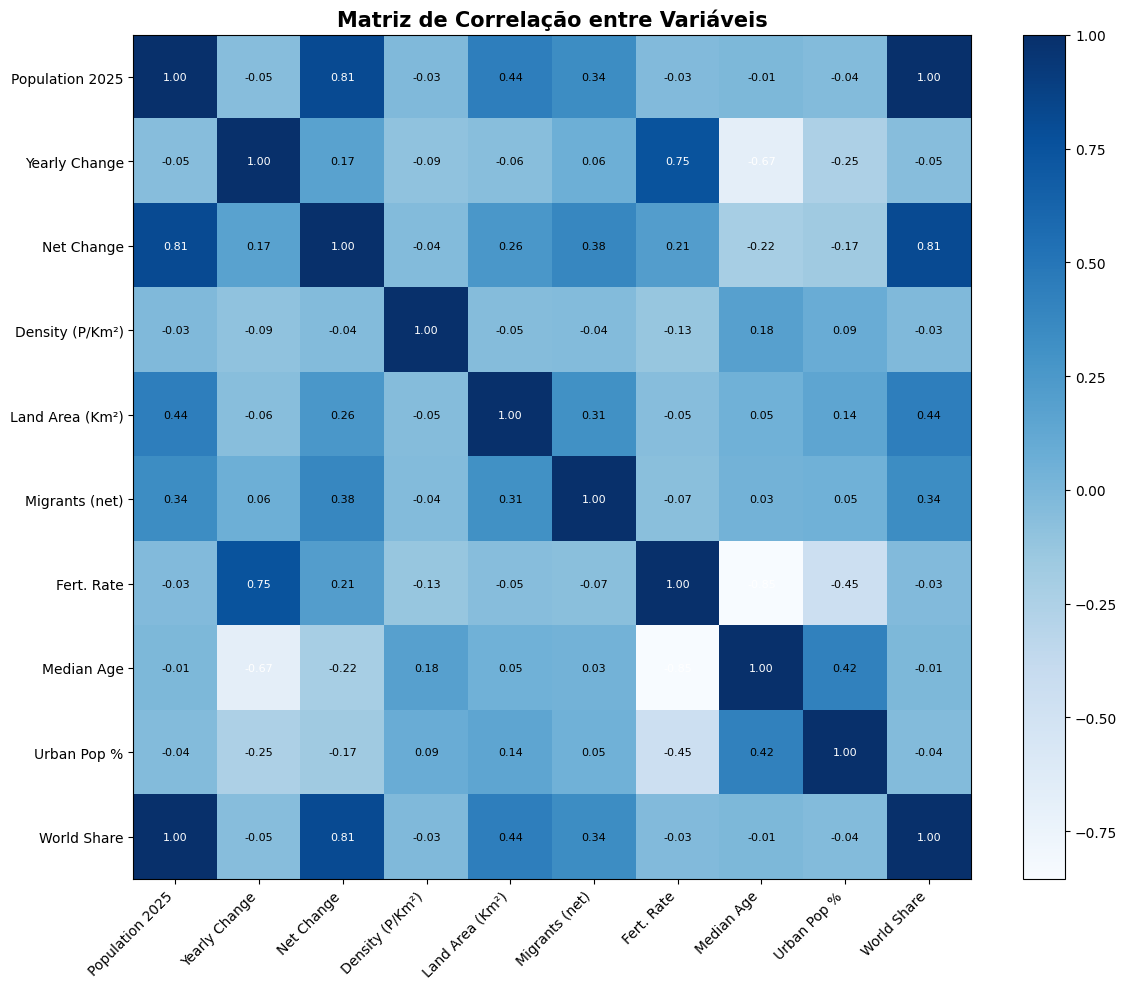

TOP 10 CORRELAÇÕES MAIS FRACAS (Menos Correlacionadas):
 1. Population 2025 ↔ Median Age
    Correlação: -0.014 (Negativa) - Correlação muito fraca

 2. Median Age ↔ World Share
    Correlação: -0.014 (Negativa) - Correlação muito fraca

 3. Population 2025 ↔ Density (P/Km²)
    Correlação: -0.028 (Negativa) - Correlação muito fraca

 4. Density (P/Km²) ↔ World Share
    Correlação: -0.028 (Negativa) - Correlação muito fraca

 5. Fert. Rate ↔ World Share
    Correlação: -0.032 (Negativa) - Correlação muito fraca

 6. Population 2025 ↔ Fert. Rate
    Correlação: -0.032 (Negativa) - Correlação muito fraca

 7. Migrants (net) ↔ Median Age
    Correlação: 0.033 (Positiva) - Correlação muito fraca

 8. Urban Pop % ↔ World Share
    Correlação: -0.036 (Negativa) - Correlação muito fraca

 9. Population 2025 ↔ Urban Pop %
    Correlação: -0.036 (Negativa) - Correlação muito fraca

10. Net Change ↔ Density (P/Km²)
    Correlação: -0.040 (Negativa) - Correlação muito fraca



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
# from scipy.stats import pearsonr

# A forma mais simples (e precisa) de carregar os dados é por meio do URL
# Como o site aparentemente possui proteção contra scraping, vamos usar um arquivo CSV local (copiado em 24 de agosto de 2025)
# Se quiser tentar o scraping, descomente o código abaixo e bibliotecas e comente a linha de leitura do CSV 
"""
import requests
from bs4 import BeautifulSoup

url = "https://www.worldometers.info/world-population/population-by-country/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing the population data (find the first table)
table = soup.find('table')

# Convert the table to a Pandas DataFrame
df = pd.read_html(str(table))[0]

# Print the DataFrame structure
print("Primeiras 10 linhas do DataFrame:")
print(df.head(10))
print("\nColunas disponíveis:")
print(df.columns.tolist())
print("\nTipos de dados:")
print(df.dtypes)
"""

# Carregar dados
data = pd.read_csv('data/worldometer2025.csv', header=0)
df = pd.DataFrame(data)

# Limpeza e conversão de dados - VERSÃO ROBUSTA
def clean_numeric_robust(series):
    """
    Função robusta para limpar e converter uma coluna para o tipo numérico.
    Remove todos os caracteres que não são dígitos, ponto decimal ou sinal de menos.
    """
    # Se a coluna já for numérica, não faz nada
    if pd.api.types.is_numeric_dtype(series):
        return series
    
    # Converte para string e remove todos os caracteres que NÃO SÃO:
    # \d -> um dígito
    # .  -> um ponto (decimal)
    # -  -> um hífen (sinal de negativo)
    # O regex '[^\d.-]' significa "qualquer caractere exceto estes".
    cleaned_series = series.astype(str).str.replace(r'[^\d.-]', '', regex=True)
    
    # Converte a série limpa para numérico. O que não for um número válido se tornará NaN.
    # Também lida com casos de strings vazias '' que podem surgir.
    return pd.to_numeric(cleaned_series, errors='coerce')

# Identificar colunas que devem ser numéricas (excluindo as de identificação)
cols_to_clean = [col for col in df.columns if col not in ['Country (or dependency)', 'Country', '#']]

# Aplicar a nova função de limpeza robusta
df[cols_to_clean] = df[cols_to_clean].apply(clean_numeric_robust)

# Imputação de dados (substituição de NaN pela média) - Esta parte já estava correta
averages = df[cols_to_clean].mean()
df[cols_to_clean] = df[cols_to_clean].fillna(averages)

print("\nPrimeiras linhas após a limpeza CORRIGIDA:")
# A correlação entre essas duas colunas agora deve ser 1.00
display(df[['Population 2025', 'World Share']].head())

# Como a limpeza já foi feita no df principal, podemos usá-lo diretamente
df_clean = df[cols_to_clean]

corr = df_clean.corr(numeric_only=True)

print("\nMatriz de Correlação:")
print(corr.round(3))

# Plot usando Matplotlib 
plt.figure(figsize=(12, 10))
im = plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar(im)
plt.xticks(range(len(corr)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr)), corr.columns)
plt.title('Matriz de Correlação entre Variáveis', fontsize=15, fontweight='bold')

# Adicionar valores de correlação no heatmap
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f'{corr.iloc[i, j]:.2f}', 
                ha='center', va='center', 
                color='white' if abs(corr.iloc[i, j]) > 0.5 else 'black',
                fontsize=8)

plt.tight_layout()
plt.show()

# Variáveis MENOS correlacionadas 

pairs = []
n = len(corr.columns)
for i in range(n):
    for j in range(i+1, n):
        pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i,j]))

# Ordenar por valor absoluto da correlação
pairs_sorted = sorted(pairs, key=lambda x: abs(x[2]), reverse=True)

print("TOP 10 CORRELAÇÕES MAIS FRACAS (Menos Correlacionadas):")

# Pegar as 10 correlações com menor valor absoluto
pairs_weakest = sorted(pairs, key=lambda x: abs(x[2]))

for i, (var1, var2, correlation) in enumerate(pairs_weakest[:10], 1):
    direction = "Positiva" if correlation > 0 else "Negativa"
    print(f"{i:2d}. {var1} ↔ {var2}")
    print(f"    Correlação: {correlation:.3f} ({direction}) - Correlação muito fraca")
    print()